# **Validación Cruzada (70%) y Métodos de Aprendizaje Supervisado**

En este notebook se implementa el proceso de validación cruzada utilizando el 70% de los datos para el entrenamiento y el 30% restante para la evaluación del modelo.
Este enfoque permite estimar de manera más robusta el desempeño de los algoritmos y reducir el riesgo de sobreajuste (overfitting), asegurando una mejor generalización sobre datos no vistos.

Asimismo, se aplican diferentes métodos de aprendizaje supervisado, con el objetivo de comparar su capacidad predictiva y determinar cuál ofrece el mejor rendimiento para el problema de diagnóstico de diabetes.
Los modelos implementados son los siguientes:

* Regresión Logística (Logistic Regression)
* Árbol de Decisión (Decision Tree)
* Red Neuronal (Neural Network)
* K-Vecinos Más Cercanos (K-Nearest Neighbors, KNN)

Para la evaluación del desempeño de los modelos se emplearán las siguientes métricas de evaluación:

* Precisión (Precision): mide la proporción de predicciones positivas que fueron correctas.

* Exhaustividad o Sensibilidad (Recall): indica la proporción de casos positivos correctamente identificados por el modelo.

* F1-Score: combina precisión y recall en una sola medida balanceada, útil cuando existe un desbalance en las clases.

* ROC-AUC: evalúa la capacidad del modelo para distinguir entre clases, proporcionando una métrica global del rendimiento clasificatorio.

Estas métricas permiten realizar una evaluación integral de los modelos, considerando tanto su capacidad de clasificación correcta como su habilidad para manejar posibles desequilibrios en los datos.

# Preparación de Datos

In [1]:
#Cargamos librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Cargamos los datos normalizados
data = pd.read_excel("datos_numericos_diabetes_dataset.xlsx")
data.head()

,Unnamed: 0,age,physical_activity_minutes_per_week,bmi,waist_to_hip_ratio,systolic_bp,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,insulin_level,hba1c,diagnosed_diabetes,family_history_diabetes_1
0,0,0.555556,0.258103,0.640496,0.564103,0.494382,0.269231,0.516432,0.366242,0.678571,0.144275,0.720690,1,0
1,1,0.416667,0.171669,0.334711,0.333333,0.438202,0.448718,0.000000,0.000000,0.294643,0.000000,0.281034,0,0
2,2,0.583333,0.068427,0.297521,0.358974,0.280899,0.589744,0.230047,0.019108,0.517857,0.101588,0.605172,1,1
3,3,0.777778,0.058824,0.487603,0.538462,0.337079,0.384615,0.136150,0.350318,0.705357,0.108537,0.867241,1,0
4,4,0.388889,0.130852,0.256198,0.282051,0.022472,0.410256,0.352113,0.414013,0.687500,0.355394,0.551724,1,0


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Unnamed: 0                          100000 non-null  int64  
 1   age                                 100000 non-null  float64
 2   physical_activity_minutes_per_week  100000 non-null  float64
 3   bmi                                 100000 non-null  float64
 4   waist_to_hip_ratio                  100000 non-null  float64
 5   systolic_bp                         100000 non-null  float64
 6   hdl_cholesterol                     100000 non-null  float64
 7   ldl_cholesterol                     100000 non-null  float64
 8   triglycerides                       100000 non-null  float64
 9   glucose_fasting                     100000 non-null  float64
 10  insulin_level                       100000 non-null  float64
 11  hba1c                      

In [4]:
# Elimianos columna unnamed: 0 (innecesaria)
data = data.drop(['Unnamed: 0'], axis=1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   age                                 100000 non-null  float64
 1   physical_activity_minutes_per_week  100000 non-null  float64
 2   bmi                                 100000 non-null  float64
 3   waist_to_hip_ratio                  100000 non-null  float64
 4   systolic_bp                         100000 non-null  float64
 5   hdl_cholesterol                     100000 non-null  float64
 6   ldl_cholesterol                     100000 non-null  float64
 7   triglycerides                       100000 non-null  float64
 8   glucose_fasting                     100000 non-null  float64
 9   insulin_level                       100000 non-null  float64
 10  hba1c                               100000 non-null  float64
 11  diagnosed_diabetes         

In [5]:
#Cargamos los datos discretizados
data_cat = pd.read_excel("datos_categoricos_diabetes_dataset.xlsx")
data_cat.head()

,Unnamed: 0,age,physical_activity_minutes_per_week,family_history_diabetes,bmi,waist_to_hip_ratio,systolic_bp,hdl_cholesterol,ldl_cholesterol,triglycerides,glucose_fasting,insulin_level,hba1c,diagnosed_diabetes
0,0,Adulto Medio,Adecuada,0,Obesidad,Moderado,Hipertensión 1,Normal,Límite Alto,Normal,Diabetes,Normal,Diabetes,1
1,1,Adulto Medio,Baja,0,Normal,Bajo,Elevada,Normal,Óptimo,Normal,Normal,Bajo,Normal,0
2,2,Adulto Medio,Inactivo,1,Normal,Moderado,Normal,Alto,Óptimo,Normal,Prediabetes,Normal,Diabetes,1
3,3,Adulto Mayor,Inactivo,0,Sobrepeso,Moderado,Normal,Normal,Óptimo,Normal,Diabetes,Normal,Diabetes,1
4,4,Adulto Medio,Baja,0,Normal,Bajo,Normal,Normal,Casi Óptimo,Límite Alto,Diabetes,Normal,Diabetes,1


In [6]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   Unnamed: 0                          100000 non-null  int64 
 1   age                                 100000 non-null  object
 2   physical_activity_minutes_per_week  100000 non-null  object
 3   family_history_diabetes             100000 non-null  int64 
 4   bmi                                 100000 non-null  object
 5   waist_to_hip_ratio                  100000 non-null  object
 6   systolic_bp                         100000 non-null  object
 7   hdl_cholesterol                     100000 non-null  object
 8   ldl_cholesterol                     100000 non-null  object
 9   triglycerides                       100000 non-null  object
 10  glucose_fasting                     100000 non-null  object
 11  insulin_level                       1000

In [7]:
#Corrección del tipo de datos object a categorías
data_cat['age'] = data_cat['age'].astype('category')
data_cat['physical_activity_minutes_per_week'] = data_cat['physical_activity_minutes_per_week'].astype('category')
data_cat['family_history_diabetes'] = data_cat['family_history_diabetes'].astype('category')
data_cat['bmi'] = data_cat['bmi'].astype('category')
data_cat['waist_to_hip_ratio'] = data_cat['waist_to_hip_ratio'].astype('category')
data_cat['systolic_bp'] = data_cat['systolic_bp'].astype('category')
data_cat['hdl_cholesterol'] = data_cat['hdl_cholesterol'].astype('category')
data_cat['ldl_cholesterol'] = data_cat['ldl_cholesterol'].astype('category')
data_cat['triglycerides'] = data_cat['triglycerides'].astype('category')
data_cat['glucose_fasting'] = data_cat['glucose_fasting'].astype('category')
data_cat['insulin_level'] = data_cat['insulin_level'].astype('category')
data_cat['hba1c'] = data_cat['hba1c'].astype('category')
data_cat['diagnosed_diabetes'] = data_cat['diagnosed_diabetes'].astype('category')
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   Unnamed: 0                          100000 non-null  int64   
 1   age                                 100000 non-null  category
 2   physical_activity_minutes_per_week  100000 non-null  category
 3   family_history_diabetes             100000 non-null  category
 4   bmi                                 100000 non-null  category
 5   waist_to_hip_ratio                  100000 non-null  category
 6   systolic_bp                         100000 non-null  category
 7   hdl_cholesterol                     100000 non-null  category
 8   ldl_cholesterol                     100000 non-null  category
 9   triglycerides                       100000 non-null  category
 10  glucose_fasting                     100000 non-null  category
 11  insulin_level 

In [8]:
# Elimianos columna unnamed: 0 (innecesaria)
data_cat = data_cat.drop(['Unnamed: 0'], axis=1)
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   age                                 100000 non-null  category
 1   physical_activity_minutes_per_week  100000 non-null  category
 2   family_history_diabetes             100000 non-null  category
 3   bmi                                 100000 non-null  category
 4   waist_to_hip_ratio                  100000 non-null  category
 5   systolic_bp                         100000 non-null  category
 6   hdl_cholesterol                     100000 non-null  category
 7   ldl_cholesterol                     100000 non-null  category
 8   triglycerides                       100000 non-null  category
 9   glucose_fasting                     100000 non-null  category
 10  insulin_level                       100000 non-null  category
 11  hba1c         

#1. División 70% - 30% (Datos Normalizados)

<Axes: xlabel='diagnosed_diabetes'>

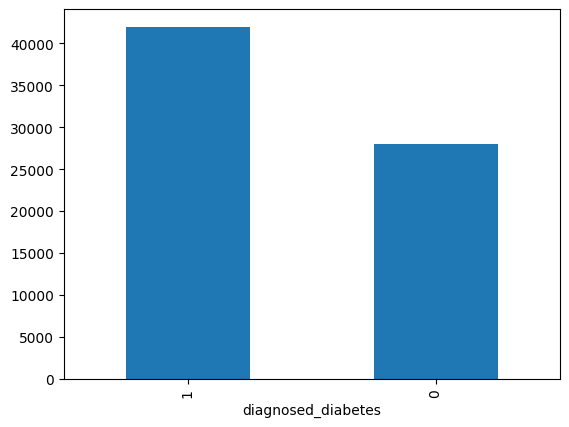

In [9]:
#División 70-30
from sklearn.model_selection import train_test_split
X = data.drop("diagnosed_diabetes", axis = 1) # Variables predictoras
Y = data['diagnosed_diabetes'] #Variable objetivo
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y) #Muestreo estratificado (cuando la variable es una categoria (solo aca), me siga el mismo patron de cantidad tanto en test como en train)
Y_train.value_counts().plot(kind='bar')

#2. Validación Cruzada

In [10]:
#Validación Cruzada
from sklearn.model_selection import cross_validate, StratifiedKFold

#Dataframe para comparar los modelos
comparacion_CV=pd.DataFrame()
scoring = ('f1_macro', 'roc_auc','precision_macro', 'recall_macro')
cv = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)# MUestreo Estratificado

# 3. Modelos Predictivos (Datos Normalizados)

3.1. KNN

In [11]:
#Método Perezoso (KNN)
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')


scores = cross_validate(model_knn, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_roc_auc,train_roc_auc,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.356943,9.363206,0.820649,0.902241,0.879205,0.966366,0.819535,0.899486,0.821923,0.905926
1,0.156033,7.622264,0.809859,0.902763,0.872251,0.966609,0.807883,0.900095,0.812560,0.906277
2,0.163173,9.113498,0.815305,0.902261,0.878451,0.966429,0.813802,0.899502,0.817143,0.905953
3,0.163987,9.486936,0.817180,0.901654,0.879009,0.966141,0.815066,0.899104,0.820119,0.904954
4,0.275540,8.130408,0.817377,0.901027,0.878775,0.966000,0.815864,0.898408,0.819226,0.904458
5,0.155901,9.305919,0.819861,0.901107,0.884302,0.965990,0.818576,0.898534,0.821369,0.904452
6,0.156425,9.382518,0.812685,0.901169,0.877220,0.966242,0.811929,0.898605,0.813512,0.904498
7,0.156913,9.470432,0.815009,0.901018,0.877276,0.965906,0.813508,0.898462,0.816845,0.904333
8,0.169458,10.168111,0.814898,0.902213,0.875955,0.966362,0.813017,0.899657,0.817381,0.905523
9,0.161001,9.746893,0.812831,0.902197,0.874536,0.966553,0.810815,0.899639,0.815595,0.905510


In [12]:
# Promedios para verificar overfitting comparando medida de train y test
scores.mean()

,0
fit_time,0.191537
score_time,9.179019
test_f1_macro,0.815565
train_f1_macro,0.901765
test_roc_auc,0.877698
train_roc_auc,0.966260
test_precision_macro,0.813999
train_precision_macro,0.899149
test_recall_macro,0.817567
train_recall_macro,0.905188


In [13]:
#Se almacena en el df la medida a comparar
comparacion_CV['Knn']=scores['test_roc_auc']
print(comparacion_CV)

        Knn
0  0.879205
1  0.872251
2  0.878451
3  0.879009
4  0.878775
5  0.884302
6  0.877220
7  0.877276
8  0.875955
9  0.874536


3.2. Red Neuronal

In [14]:
#Validación Cruzada: division, aprendizaje, evaluacion

#Red neuronal
from sklearn.neural_network import MLPClassifier
model_rn = MLPClassifier(activation="relu",hidden_layer_sizes=(20), learning_rate='constant',
                     learning_rate_init=0.1, momentum= 0.7, max_iter=500, verbose=False)


scores = cross_validate(model_rn, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_roc_auc,train_roc_auc,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,3.055943,0.023874,0.907735,0.906699,0.948268,0.944140,0.906951,0.906012,0.923673,0.922765
1,5.609257,0.022172,0.908468,0.910748,0.944002,0.946306,0.905103,0.907397,0.919881,0.922334
2,8.569237,0.041823,0.901038,0.900057,0.944887,0.943624,0.898133,0.897083,0.913214,0.912009
3,5.239202,0.023051,0.906327,0.905415,0.947065,0.943463,0.904134,0.903188,0.920179,0.919159
4,4.935419,0.022369,0.899466,0.899213,0.941963,0.943519,0.896662,0.896150,0.911786,0.910898
5,4.783487,0.023458,0.901478,0.901839,0.940798,0.943992,0.898578,0.899219,0.913690,0.914668
6,4.730322,0.023573,0.903499,0.902438,0.945853,0.944001,0.903533,0.902727,0.920298,0.919475
7,8.377927,0.032465,0.899508,0.898533,0.943806,0.943532,0.896412,0.895478,0.911131,0.910197
8,7.991906,0.041255,0.908495,0.907719,0.941782,0.944381,0.907016,0.906133,0.923571,0.922597
9,12.083590,0.042553,0.896481,0.898083,0.940249,0.943594,0.893925,0.894750,0.909167,0.908921


In [15]:
scores.mean()

,0
fit_time,6.537629
score_time,0.029659
test_f1_macro,0.903249
train_f1_macro,0.903075
test_roc_auc,0.943867
train_roc_auc,0.944055
test_precision_macro,0.901045
train_precision_macro,0.900814
test_recall_macro,0.916659
train_recall_macro,0.916302


In [16]:
#Se almacena en el df la medida a comparar
comparacion_CV['Red_Neuronal']=scores['test_roc_auc']
print(comparacion_CV)

        Knn  Red_Neuronal
0  0.879205      0.948268
1  0.872251      0.944002
2  0.878451      0.944887
3  0.879009      0.947065
4  0.878775      0.941963
5  0.884302      0.940798
6  0.877220      0.945853
7  0.877276      0.943806
8  0.875955      0.941782
9  0.874536      0.940249


3.2. Regresión Logística

In [17]:
#Validación Cruzada: division, aprendizaje, evaluacion

#Regresión Logística
from sklearn.linear_model import LogisticRegression

model_rl = LogisticRegression(
    solver='liblinear',      # Algoritmo adecuado para datasets pequeños o medianos
    penalty='l2',            # Regularización L2 por defecto
    max_iter=1000,           # Aumentar iteraciones para asegurar convergencia
    random_state=42
)

scores = cross_validate(model_rl, X_train, Y_train, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False)
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe

scores


,fit_time,score_time,test_f1_macro,train_f1_macro,test_roc_auc,train_roc_auc,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.229875,0.016321,0.854444,0.850885,0.937059,0.933877,0.858462,0.853576,0.851334,0.848657
1,0.248503,0.018553,0.854420,0.851931,0.932130,0.934395,0.856126,0.854644,0.852917,0.849685
2,0.269197,0.015204,0.852887,0.851468,0.936159,0.933990,0.855579,0.854118,0.850655,0.849268
3,0.270418,0.016829,0.845414,0.851748,0.932554,0.934418,0.848876,0.854409,0.842679,0.849540
4,0.281119,0.020696,0.854383,0.851615,0.933621,0.934261,0.856195,0.854324,0.852798,0.849374
5,0.277345,0.015123,0.849217,0.851127,0.935862,0.933960,0.853026,0.853848,0.846250,0.848878
6,0.258193,0.015399,0.852139,0.850908,0.935653,0.934038,0.855757,0.853637,0.849286,0.848653
7,0.256095,0.023616,0.852747,0.851304,0.935308,0.934081,0.855409,0.853994,0.850536,0.849077
8,0.256407,0.015398,0.850987,0.851910,0.933978,0.934214,0.853523,0.854585,0.848869,0.849692
9,0.244998,0.015652,0.848285,0.852672,0.929218,0.934760,0.849195,0.855365,0.847440,0.850439


In [18]:
scores.mean()

,0
fit_time,0.259215
score_time,0.017279
test_f1_macro,0.851492
train_f1_macro,0.851557
test_roc_auc,0.934154
train_roc_auc,0.934200
test_precision_macro,0.854215
train_precision_macro,0.854250
test_recall_macro,0.849276
train_recall_macro,0.849326


In [19]:
#Se almacena en el df la medida a comparar
comparacion_CV['Regresion_Logistica']=scores['test_roc_auc']
print(comparacion_CV)

        Knn  Red_Neuronal  Regresion_Logistica
0  0.879205      0.948268             0.937059
1  0.872251      0.944002             0.932130
2  0.878451      0.944887             0.936159
3  0.879009      0.947065             0.932554
4  0.878775      0.941963             0.933621
5  0.884302      0.940798             0.935862
6  0.877220      0.945853             0.935653
7  0.877276      0.943806             0.935308
8  0.875955      0.941782             0.933978
9  0.874536      0.940249             0.929218


#4. División 70% - 30% (Datos discretizados)

In [20]:
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                              Non-Null Count   Dtype   
---  ------                              --------------   -----   
 0   age                                 100000 non-null  category
 1   physical_activity_minutes_per_week  100000 non-null  category
 2   family_history_diabetes             100000 non-null  category
 3   bmi                                 100000 non-null  category
 4   waist_to_hip_ratio                  100000 non-null  category
 5   systolic_bp                         100000 non-null  category
 6   hdl_cholesterol                     100000 non-null  category
 7   ldl_cholesterol                     100000 non-null  category
 8   triglycerides                       100000 non-null  category
 9   glucose_fasting                     100000 non-null  category
 10  insulin_level                       100000 non-null  category
 11  hba1c         

In [21]:
# Creamos variables dummy para convertir las categorías a números
data_cat = pd.get_dummies(data_cat, columns=['age', 'physical_activity_minutes_per_week',
                                             'bmi', 'waist_to_hip_ratio', 'systolic_bp',
                                             'hdl_cholesterol', 'ldl_cholesterol', 'triglycerides',
                                             'glucose_fasting', 'insulin_level', 'hba1c'], drop_first=False, dtype=int)

# Variables con dos categorías (drop_first=True)
data_cat = pd.get_dummies(data_cat, columns=['family_history_diabetes'], drop_first=True, dtype=int)

data_cat.head()

,diagnosed_diabetes,age_Adulto Joven,age_Adulto Mayor,age_Adulto Medio,age_Anciano,age_Joven,physical_activity_minutes_per_week_Adecuada,physical_activity_minutes_per_week_Alta,physical_activity_minutes_per_week_Baja,physical_activity_minutes_per_week_Inactivo,...,glucose_fasting_Normal,glucose_fasting_Prediabetes,insulin_level_Bajo,insulin_level_Elevado,insulin_level_Muy Elevado,insulin_level_Normal,hba1c_Diabetes,hba1c_Normal,hba1c_Prediabetes,family_history_diabetes_1
0,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,1,0,0,1
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
4,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


In [22]:
#Se codifican las categorias de la VARIABLE OBJETIVO (Cambiar high y low por 0 y 1)

from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data_cat["diagnosed_diabetes"]=labelencoder.fit_transform(data_cat["diagnosed_diabetes"]) #Objetivo

data_cat.head()

,diagnosed_diabetes,age_Adulto Joven,age_Adulto Mayor,age_Adulto Medio,age_Anciano,age_Joven,physical_activity_minutes_per_week_Adecuada,physical_activity_minutes_per_week_Alta,physical_activity_minutes_per_week_Baja,physical_activity_minutes_per_week_Inactivo,...,glucose_fasting_Normal,glucose_fasting_Prediabetes,insulin_level_Bajo,insulin_level_Elevado,insulin_level_Muy Elevado,insulin_level_Normal,hba1c_Diabetes,hba1c_Normal,hba1c_Prediabetes,family_history_diabetes_1
0,1,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,1,1,0,0,0
1,0,0,0,1,0,0,0,0,1,0,...,1,0,1,0,0,0,0,1,0,0
2,1,0,0,1,0,0,0,0,0,1,...,0,1,0,0,0,1,1,0,0,1
3,1,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,1,0,0,0
4,1,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,1,1,0,0,0


<Axes: xlabel='diagnosed_diabetes'>

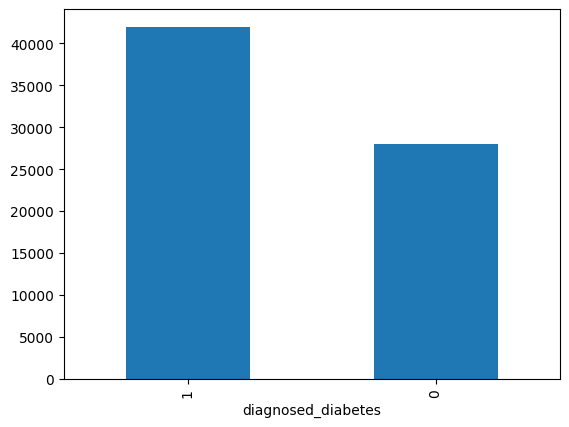

In [23]:
#División 70-30
from sklearn.model_selection import train_test_split
X_C = data_cat.drop("diagnosed_diabetes", axis = 1) # Variables predictoras
Y_C = data_cat['diagnosed_diabetes'] #Variable objetivo
X_train_C, X_test_C, Y_train_C, Y_test_C = train_test_split(X_C, Y_C, test_size=0.3, stratify=Y) #Muestreo estratificado (cuando la variable es una categoria (solo aca), me siga el mismo patron de cantidad tanto en test como en train)
Y_train_C.value_counts().plot(kind='bar')

In [24]:
#Método de ML a usar en la validación cruzada
from sklearn.tree import DecisionTreeClassifier # Importar el clasificador

# Inicializar el modelo de Árbol de Decisión para clasificación
modelTree = DecisionTreeClassifier(criterion='gini', min_samples_leaf=10, max_depth=None) # Usar el clasificador

scores = cross_validate(modelTree, X_C, Y_C, cv=cv, scoring=scoring, return_train_score=True, return_estimator=False) # return_train_score=True saber si tiene overfitting
scores=pd.DataFrame(scores) #Se almacenan los resultados en un dataframe
scores

,fit_time,score_time,test_f1_macro,train_f1_macro,test_roc_auc,train_roc_auc,test_precision_macro,train_precision_macro,test_recall_macro,train_recall_macro
0,0.447446,0.023878,0.910016,0.914461,0.935409,0.964147,0.907539,0.912023,0.923542,0.928271
1,0.689130,0.045389,0.909673,0.914247,0.935524,0.963921,0.907493,0.912099,0.923708,0.928549
2,1.019326,0.081877,0.906425,0.914785,0.931701,0.964634,0.904287,0.912325,0.920375,0.928572
3,0.350980,0.021709,0.911419,0.914007,0.936565,0.964146,0.908443,0.911508,0.924000,0.927683
4,0.330721,0.022503,0.907923,0.914579,0.931943,0.964754,0.905647,0.912162,0.921708,0.928433
5,0.336735,0.020541,0.906808,0.914577,0.935007,0.964517,0.904558,0.912211,0.920583,0.928521
6,0.323201,0.020928,0.905066,0.914633,0.931775,0.964751,0.902765,0.912154,0.918667,0.928377
7,0.303880,0.020960,0.908617,0.914500,0.931530,0.964449,0.906260,0.912034,0.922292,0.928262
8,0.303174,0.021451,0.908442,0.914342,0.936304,0.964554,0.906204,0.912041,0.922282,0.928392
9,0.308926,0.022055,0.907224,0.914663,0.932618,0.964260,0.905001,0.912273,0.921032,0.928573


In [25]:
scores.mean()

,0
fit_time,0.441352
score_time,0.030129
test_f1_macro,0.908161
train_f1_macro,0.914479
test_roc_auc,0.933837
train_roc_auc,0.964413
test_precision_macro,0.905819
train_precision_macro,0.912083
test_recall_macro,0.921819
train_recall_macro,0.928363


In [26]:
#Se almacena en el df la medida a comparar
comparacion_CV['Tree']=scores['test_roc_auc']
print(comparacion_CV)

        Knn  Red_Neuronal  Regresion_Logistica      Tree
0  0.879205      0.948268             0.937059  0.935409
1  0.872251      0.944002             0.932130  0.935524
2  0.878451      0.944887             0.936159  0.931701
3  0.879009      0.947065             0.932554  0.936565
4  0.878775      0.941963             0.933621  0.931943
5  0.884302      0.940798             0.935862  0.935007
6  0.877220      0.945853             0.935653  0.931775
7  0.877276      0.943806             0.935308  0.931530
8  0.875955      0.941782             0.933978  0.936304
9  0.874536      0.940249             0.929218  0.932618
